In [25]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [26]:
h5_ts_file = h5py.File('elekin_phd_et.hdf5','r')

In [27]:
h5_ts_file.keys()

<KeysViewHDF5 ['cerebellum_ts']>

In [28]:
group = h5_ts_file.get('cerebellum_ts')

In [99]:
timeseries = np.empty([102,158,28])
timeseries.shape

(102, 158, 28)

In [100]:
for i,item in enumerate(group):
    new = np.array(group.get(item))
    #print(item)
    #print(timeseries[i].shape)
    #print(new.shape)
    if new.shape[0] == 158:
        timeseries[i] = np.array(new)

In [101]:
timeseries.shape

(102, 158, 28)

In [106]:
X_train=timeseries

In [102]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

In [103]:
np.array(['C' in item for item in group],dtype=np.int8)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int8)

In [104]:
Y_train = to_categorical(np.array(['C' in item for item in group],dtype=np.int8))
#test_labels = to_categorical(test_labels)

In [107]:
X_train.shape,Y_train.shape

((102, 158, 28), (102, 2))

In [108]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
#X_test_data_flat = test_data.reshape((test_data.shape[0], -1))
X_train_flat.shape

(102, 4424)

In [128]:
model = Sequential()
model.add(Dense(8, input_shape=(X_train_flat.shape[-1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.15))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Train on 81 samples, validate on 21 samples
Epoch 1/15
81/81 [==============================] - 0s 763us/step - loss: 0.0856 - acc: 0.9753 - val_loss: 1.8010 - val_acc: 0.4286
Epoch 2/15
81/81 [==============================] - 0s 291us/step - loss: 0.0834 - acc: 0.9753 - val_loss: 1.9116 - val_acc: 0.4286
Epoch 3/15
81/81 [==============================] - 0s 275us/step - loss: 0.0809 - acc: 0.9753 - val_loss: 2.0036 - val_acc: 0.4286
Epoch 4/15
81/81 [==============================] - 0s 277us/step - loss: 0.0759 - acc: 0.9753 - val_loss: 2.0916 - val_acc: 0.4286
Epoch 5/15
81/81 [==============================] - 0s 269us/step - loss: 0.0751 - acc: 0.9753 - val_loss: 2.1818 - val_acc: 0.4286
Epoch 6/15
81/81 [==============================] - 0s 293us/step - loss: 0.0741 - acc: 0.9753 - val_loss: 2.2445 - val_acc: 0.4286
Epoch 7/15
81/81 [==============================] - 0s 278us/step - loss: 0.0731 - acc: 0.9753 - val_loss: 2.3122 - val_acc: 0.4286
Epoch 8/15
81/81 [==============

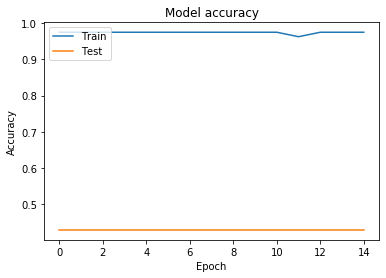

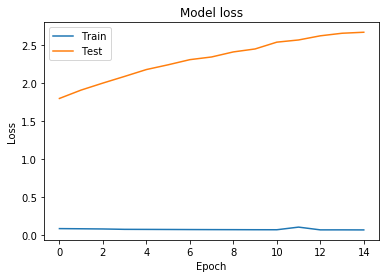

In [130]:
history = model.fit(X_train_flat, Y_train, epochs=15, batch_size=8, validation_split=0.2)


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [131]:
h5_ts_file.close()